In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('dataset.csv')
data_clust=data.iloc[0:897,0:15]
data_recom=data.iloc[:,15:]

In [3]:
data_clust.head(2)

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.02,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.20,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE


In [4]:
data_recom.head(2)

,userId,productId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1


In [5]:
data_clust.isnull().sum().sum()

0

In [6]:
inp_data_clust=data_clust.drop('M3',axis=1)
out_data_clust=data_clust[['M3']]

In [7]:
inp_data_clust.head(2)

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.02,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.20,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700


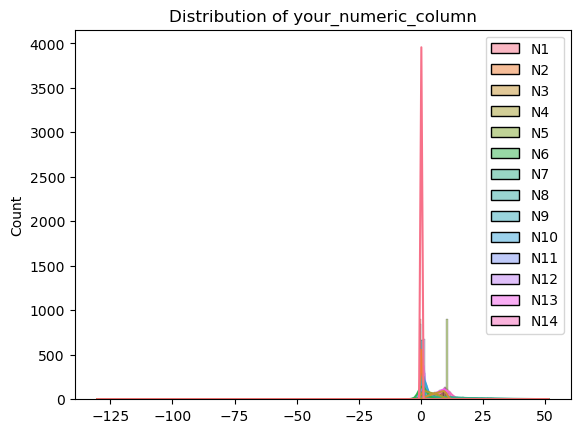

In [8]:
sns.histplot(inp_data_clust, kde=True)
plt.title('Distribution of your_numeric_column')
plt.show()

In [9]:
inp_data_clust.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
count,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.102562,0.046943,6.716206,3.813087,1.053390e+01,0.590930,15.174203,11.380670,0.636903,1.355093,1.268476,0.931242,7.478824,9.424846
std,0.041445,0.035557,2.660483,2.663513,1.084182e-13,5.738883,12.451183,9.338373,0.253457,0.931909,5.701704,1.214843,2.284943,5.995644
min,-0.000900,0.000100,0.000100,-0.807817,1.053390e+01,-130.236576,0.000100,0.000100,0.000009,-0.262316,-129.986635,-25.747386,0.000120,-119.725790
25%,0.075100,0.016100,4.794128,1.523688,1.053390e+01,0.165759,4.800100,3.600100,0.455020,0.553417,1.016933,0.568474,5.953814,8.326474
50%,0.102100,0.039100,7.110902,3.411969,1.053390e+01,0.398919,12.000100,9.000100,0.675049,1.214296,1.168410,0.838998,7.857244,9.666531
75%,0.132100,0.072100,9.008911,5.739776,1.053390e+01,1.013910,22.800100,17.100100,0.855230,2.024717,1.529315,1.292233,9.395223,10.964555
max,0.218100,0.149100,11.341721,10.533804,1.053390e+01,33.864220,51.200100,38.400100,1.076687,3.686851,34.116849,7.075999,11.376482,44.173466


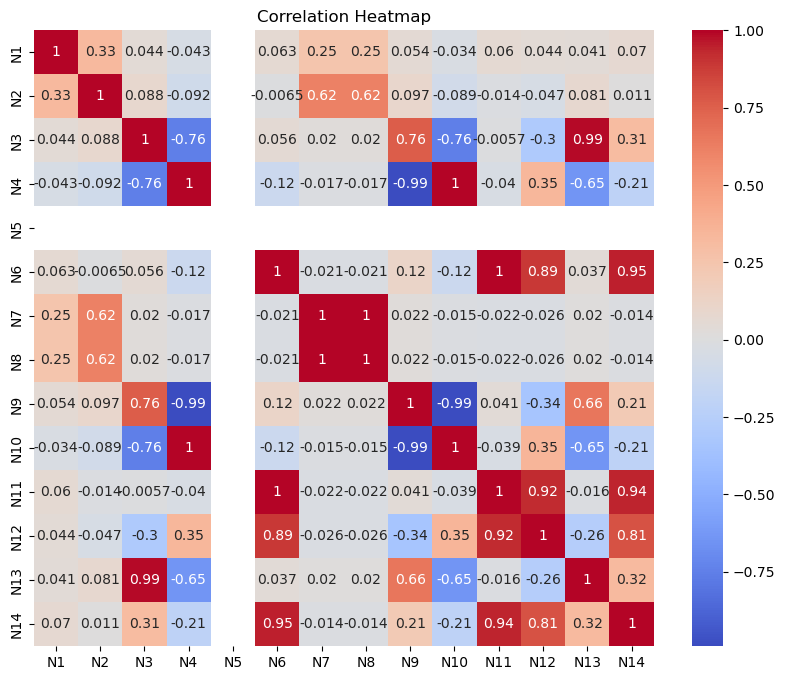

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(inp_data_clust.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

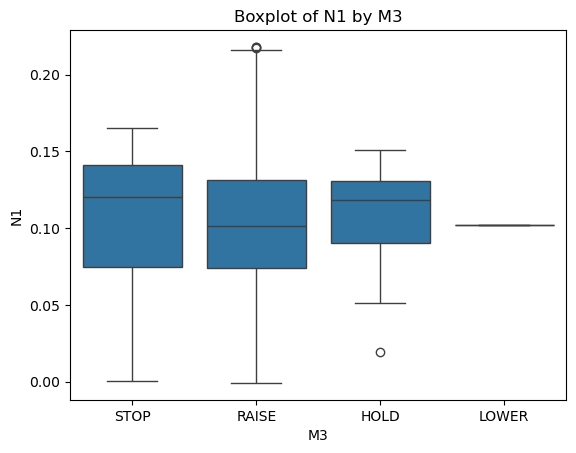

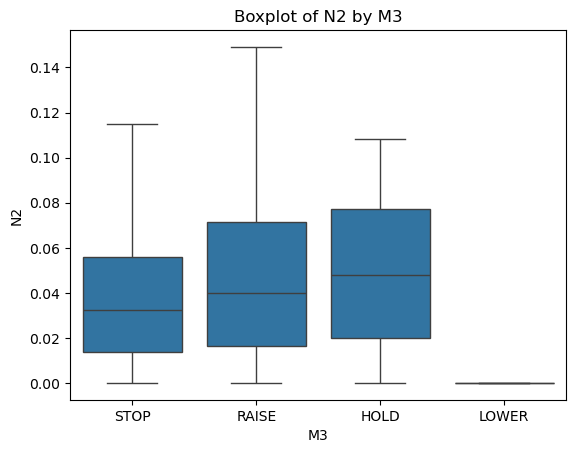

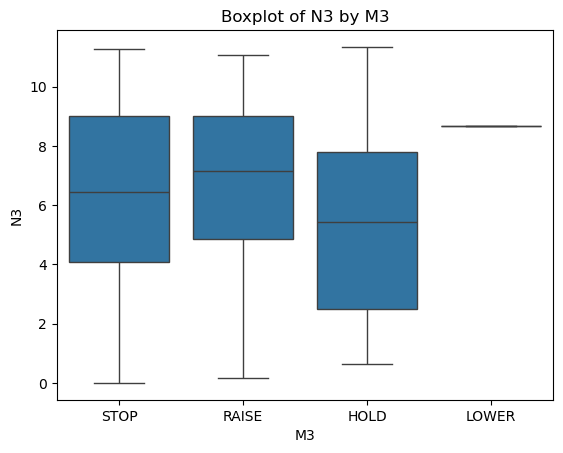

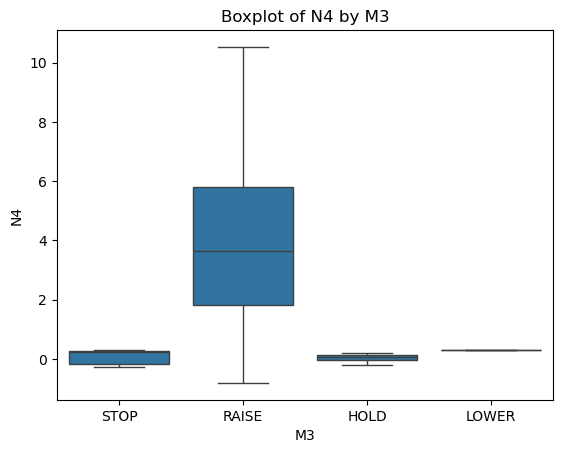

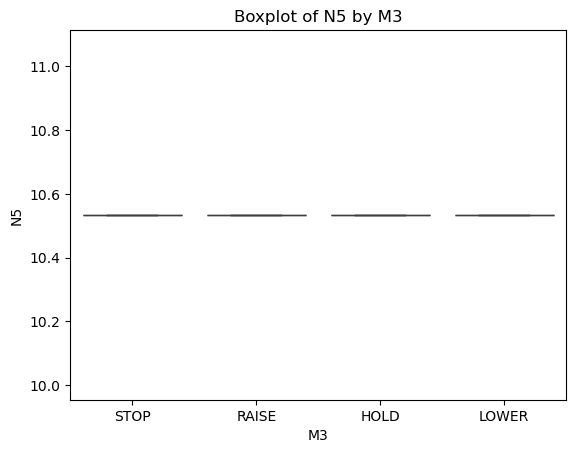

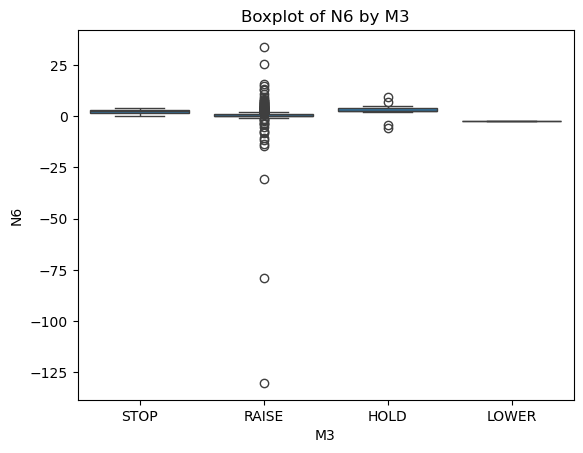

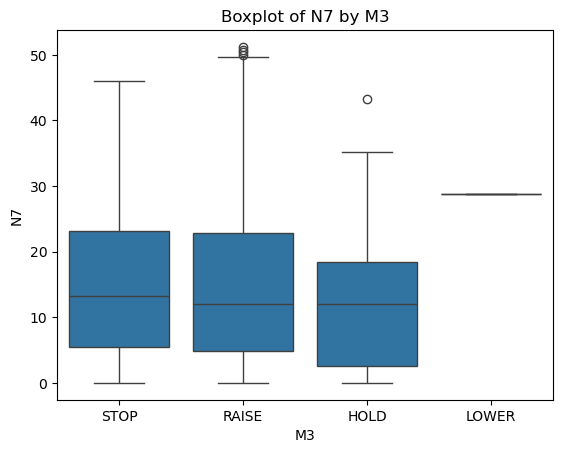

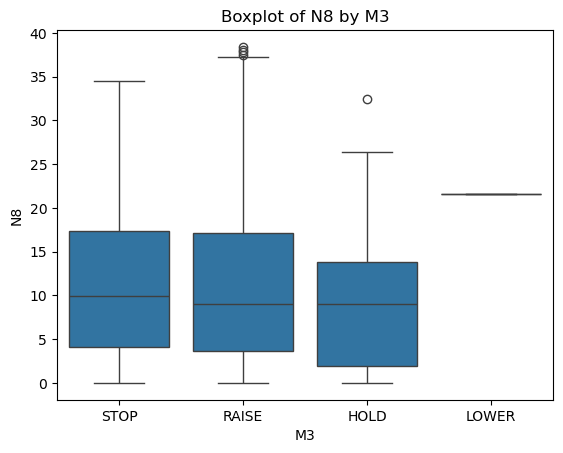

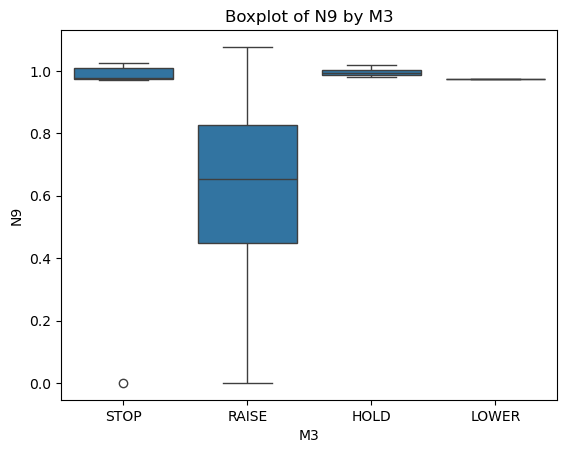

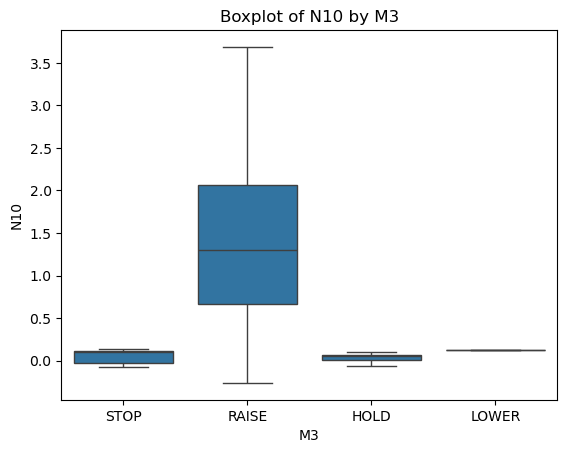

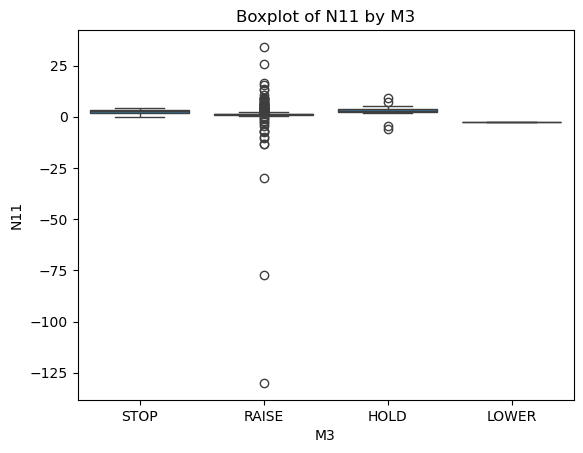

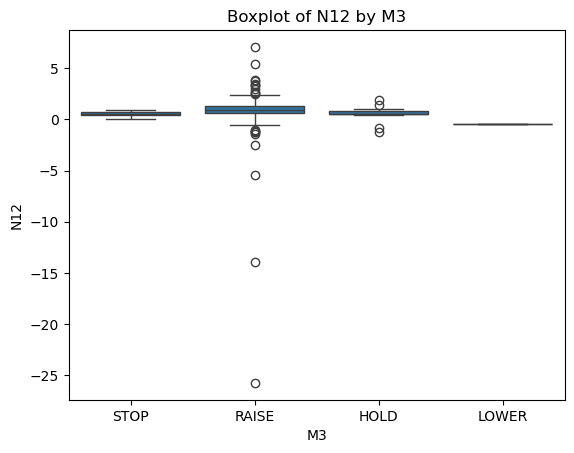

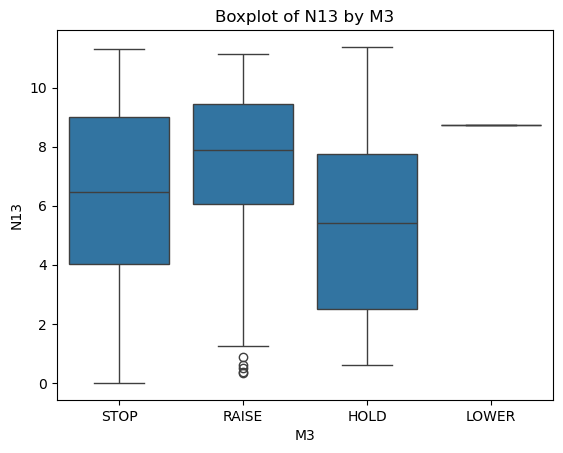

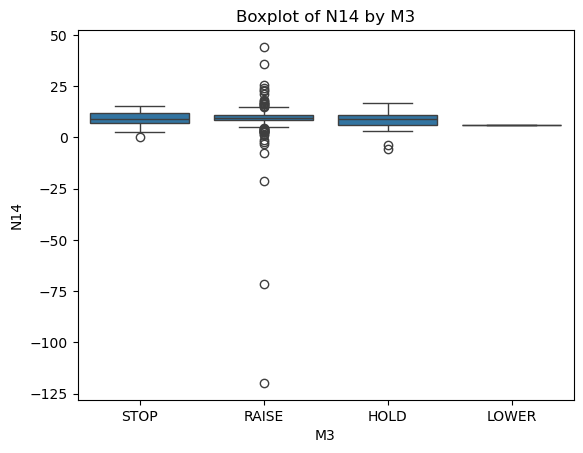

In [11]:
for i in inp_data_clust.columns:
    sns.boxplot(x=out_data_clust['M3'], y=inp_data_clust[i])
    plt.title(f"Boxplot of {i} by M3")
    plt.show()

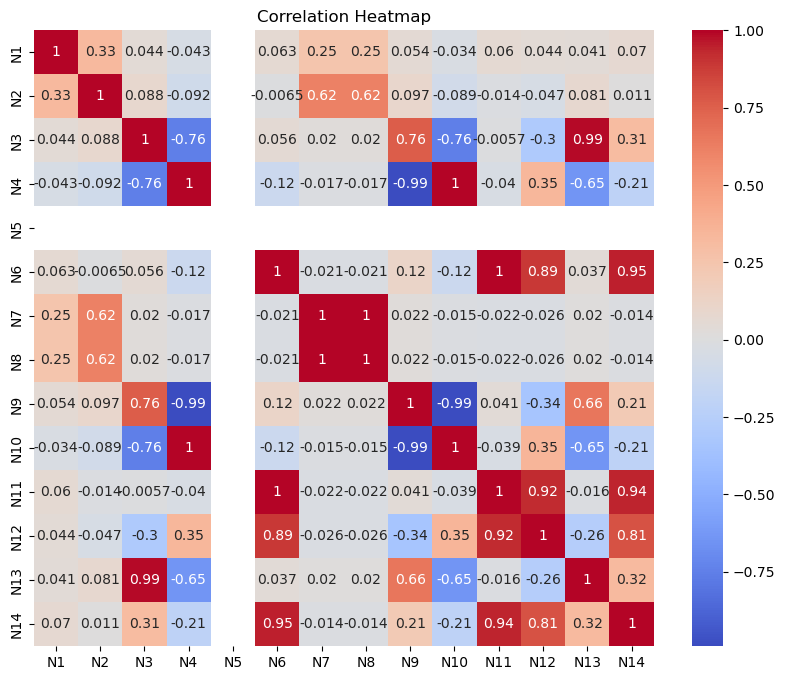

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(inp_data_clust.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
inp_data_clust.drop(columns=['N6','N7','N11','N13'], inplace = True)

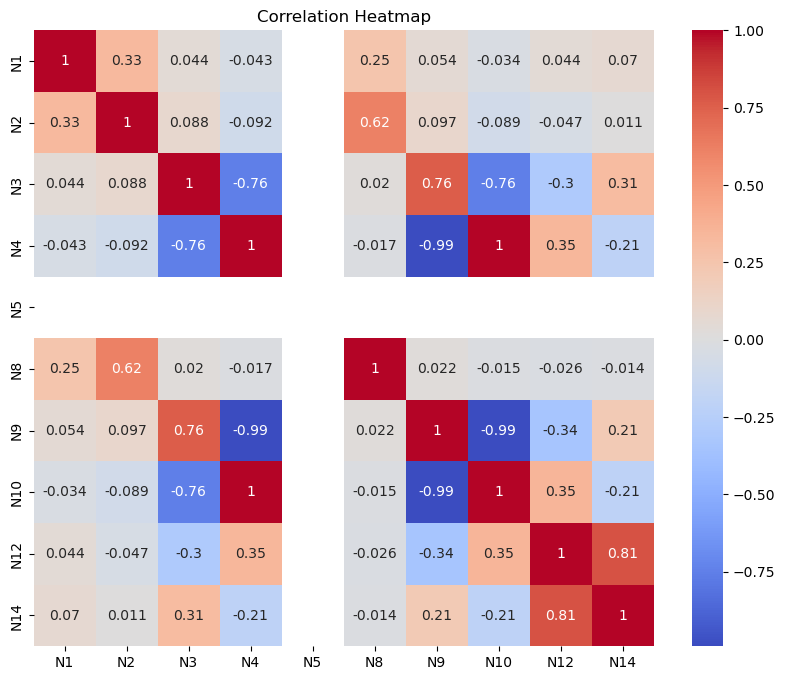

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(inp_data_clust.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

125204.30440048061
68519.74534999128
45683.73914767137
34091.947988260945
30645.035176431713
24655.738738275813
21243.285548684926
19340.784192400934


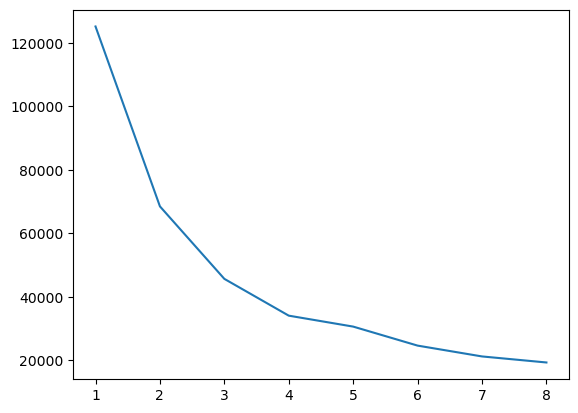

In [15]:
wcss=[]
cl=[1,2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i,random_state=10)
    mod.fit(inp_data_clust)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)

At k =3, elbow point is visible. 3 groups can be well extracted from this dataset

In [16]:
sil=[]
cl=[2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i)
    mod.fit(inp_data_clust)
    sil.append(silhouette_score(inp_data_clust,mod.labels_))
res=pd.DataFrame({'k':cl,'silhoutee':sil})
res

,k,silhoutee
0,2,0.490527
1,3,0.355918
2,4,0.370314
3,5,0.338260
4,6,0.328665
5,7,0.327422
6,8,0.339070


At k =2, silhoutee score is high. 3 groups can be well extracted from this dataset

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inp_data_clust)

In [18]:
pca = PCA(n_components = X_scaled.shape[1])
pca_data = pca.fit_transform(X_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent varaition in data is : ',itr,' ; Variance explained is ', cum_var)

The number of principle components capturing 95 percent varaition in data is :  5  ; Variance explained is  0.9587615442773635


Text(0, 0.5, 'Variance Ratio')

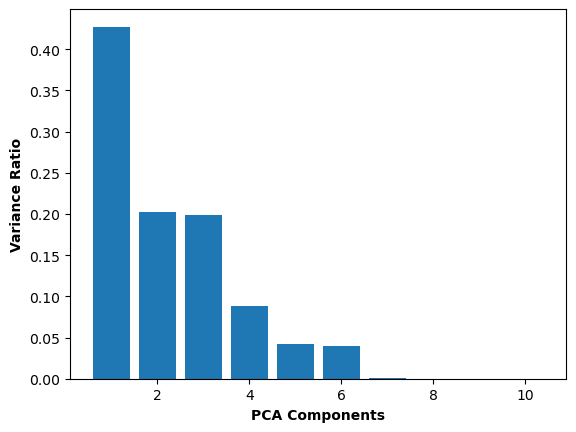

In [19]:
# Variance Ratio bar plot for each PCA components.
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [20]:
# PC1 is derived from first eigen vector
e1=pd.DataFrame(pca.components_[0,:]) # first eigen vector
e1.index=inp_data_clust.columns
e11=np.abs(e1)
e11.sort_values(0,ascending=False).head(5) # Top 5 features contributing in PC1

,0
N9,0.500668
N4,0.500528
N10,0.500334
N3,0.435165
N12,0.199075


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,out_data_clust,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('The number of input feature ',xtrain.shape[1])
print(classification_report(ytest,ypred))

C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The number of input feature  10
              precision    recall  f1-score   support

        HOLD       1.00      1.00      1.00        10
       RAISE       1.00      1.00      1.00       166
        STOP       1.00      1.00      1.00         4

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_data[:,:5],out_data_clust,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('The number of PCA components ',xtrain.shape[1])
print(classification_report(ytest,ypred))

C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The number of PCA components  5
              precision    recall  f1-score   support

        HOLD       0.00      0.00      0.00        10
       RAISE       0.93      1.00      0.96       166
        STOP       0.00      0.00      0.00         4

    accuracy                           0.92       180
   macro avg       0.31      0.33      0.32       180
weighted avg       0.86      0.92      0.89       180



C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [23]:
scores = cross_val_score(rf, X_scaled, out_data_clust, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manju\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

Cross-validation scores: [0.99444444 0.98333333 0.98324022 1.         1.        ]
Average accuracy: 0.992203600248293


In [24]:
data_recom.head(2)

,userId,productId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [26]:
# Step 2: Create a user-item matrix (rows: users, columns: products)
user_item_matrix = data_recom.pivot_table(index='userId', columns='productId', values='Rating').fillna(0)

# Step 3: Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Step 4: Predict a rating for a given user and product
def predict_rating(user_id, product_id):
    if product_id not in user_item_matrix.columns:
        return np.nan  # can't predict for unseen product

    # Get similarities of the target user with all other users
    sim_scores = user_similarity_df[user_id]

    # Get ratings of all other users for the product
    product_ratings = user_item_matrix[product_id]

    # Exclude self-similarity
    mask = (product_ratings != 0) & (user_item_matrix.index != user_id)
    if mask.sum() == 0:
        return np.nan  # no one else rated it

    sim_scores = sim_scores[mask]
    product_ratings = product_ratings[mask]

    # Weighted average
    pred = np.dot(sim_scores, product_ratings) / sim_scores.sum()
    return pred

# Example: Predict rating for A2CX7LUOHB2NDG on product 439886341
pred_rating = predict_rating('A2CX7LUOHB2NDG', '439886341')
print("Predicted Rating:", pred_rating)

Predicted Rating: nan


C:\Users\manju\AppData\Local\Temp\ipykernel_9136\4049980357.py:28: RuntimeWarning: invalid value encountered in scalar divide
  pred = np.dot(sim_scores, product_ratings) / sim_scores.sum()
